#### Amy Green - 200930437 

# <center>  5990M: Introduction to Programming for Geographical Information Analysis - Core Skills </center>

##  <center><u> __**Assignment 2: Investigating the Black Death**__ </u></center>
-------------------------------------------------------------

### Project Aim

<p>The aim of the project hopes to build a model, based upon initial agent-based framework coding schemes, that generates an analysis into an aspect of 'The Black Death'. This project intends to calculate the fatalities from The Great Plague of London via the known population densities of London parishes in 1665. The generation of this measure from historical data will allow any correlation to be investigated and an overall map of total deaths to be produced. Furthermore, the final code should allow for manipulation in terms of changing parameter weights to investigate possible scenarios that could have ensued. </p>

### Context
<p>The Great Plague of London (1665-1666) was the last occurrence of the fatal ‘Black Death’ Plague that swept across Europe in the 1300s. The bubonic plague caused an epidemic across the 17th century parishes of London, as well as some smaller areas of the UK. The overcrowded city and hot Summer became a breeding ground for the bacterium <i>Yersinia pestis</i> disseminated by rat fleas – the known cause of the plague. Transmission was inevitable due to the high poverty levels, low sanitation rates, and open sewers in closely packed waste-filled streets; especially in poorer areas (Trueman, 2015). Deaths started slowly within the St. Giles’s Parish but rose alarmingly as documented by the weekly ‘Bill of Mortality’ that was legally required from each parish at the time (Defoe, 2005). The numbers of deaths slowed after 18 months due to quarantines, much of the population moving to the country and the onset of Winter, however, the final end emerged due to the Great Fire of London destroying central parts of the city in September 1666. </p>


### Data Source
<p>The calculation of the average death rate from the Great Plague will be generated from two raster maps. The model will be using known rat populations and average population densities of 16 different parishes within London, both from historical records, recorded by rat-catchers and parish figures in 1665, respectively. The original maps have data stored for each 400m x 400m area as text data, but the figures have been averaged to represent either the area covered by the Parish or the area within which the rat-catcher operates.
    
The relationship to calculate the average death rate from this source data is as follows: 

<b>Death Rate = (0.8 x Rat Population)(1.3 x Population Density) </b></p> 


### Model Expectations 

<p>The model should first show maps of the original source data: the rat populations and population densities for the 16 investigated parishes. These maps will then be combined using the calculation to generate the average death rate from the Great Plague per week and will be mapped as an image. The final map will then be altered so the user will be able to manipulate the weights of either the rat population or the density population to envision how these alternate factors may change the overall death rate. </p>
    
<p>The code should run on Windows.</p>


------------------------------------------------------------------------------
### Part 1 - Read in Source Data

In [25]:
#Set up initial imports
import random
%matplotlib inline 
import matplotlib.pyplot 
import matplotlib
import matplotlib.animation
import requests
import tkinter
import pandas as pd
import numpy as np
import bs4 

<p><u> Map 1</u> - Rat Populations (Average Rats caught per week) </p>

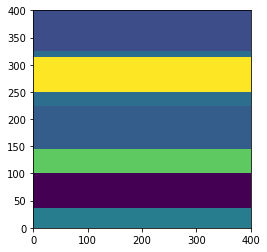

In [3]:
'''Step 1 - Import data for the rat populations and generate environment from the 2D array'''

import os
base_path = "C:\\Users\\Home\\Documents\\MSc GIS\\Programming\\Black_Death\\BlackDeathProject"
deathrats = "deathrats.txt"
path_to_file = os.path.join(base_path, deathrats)
f = open(path_to_file , 'r')
#mapA = f.read()
#print(mapA) #Test to show data has imported
environmentA = []
for line in f:
    parsed_line = str.split(line, ",")
    rowlist = []
    for word in parsed_line:
        rowlist.append(float(word))
    environmentA.append(rowlist)
f.close()
#print(environmentA) #Test environment appears and all lines run 

#Display environment of rat populations
matplotlib.pyplot.xlim(0, 400) #Set up x-axis
matplotlib.pyplot.ylim(0, 400) #Set up y-axis
matplotlib.pyplot.imshow(environmentA) #Shows the environment


<p> This map contains the data for the average rat populations denoted from the amount of rats caught per week. The data is initially placed into a text file which can be seen through print(mapA), but then has been put into an environment which is shown. The different colours show the different amounts of rats, however, this will have more useful when combined with Map 2 in Part 2 when calculating the overall death rates. </p>

<p><u> Map 2</u> - Average Population Densities (per Parish) </p>

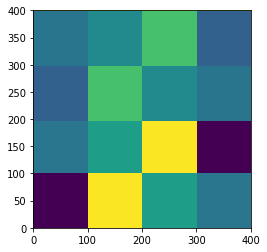

In [4]:
'''Step 2 - Import data for the parish population densities and generate environment from the 2D array'''

#base_path = "C:\\Users\\Home\\Documents\\MSc GIS\\Programming\\Black_Death"
deathparishes = "deathparishes.txt"
path_to_file = os.path.join(base_path, deathparishes)
fd = open(path_to_file , 'r')
#mapB = fd.read()
#print(mapB) #Test to show data has imported
environmentB = []
for line in fd:
    parsed_line = str.split(line, ",")
    rowlist = []
    for word in parsed_line:
        rowlist.append(float(word))
    environmentB.append(rowlist)
f.close()
#print(environmentB) #Test environment appears and all lines run 

#Display environment of parish populations
matplotlib.pyplot.xlim(0, 400) #Set up x-axis
matplotlib.pyplot.ylim(0, 400) #Set up y-axis
matplotlib.pyplot.imshow(environmentB) #Shows the environment


<p> This map contains the data for the average population densities per the 16 parishes investigated. The data is initially placed into a text file which can be seen through print(mapB), but then has been put into an environment which is shown. The different colours show the different populations per parish. </p>

------------------------------------------------------------------------------
### Part 2 - Calculate the Average Death Rate

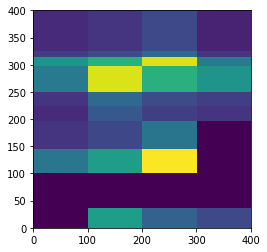

In [8]:
'''Step 3 - Calculate Map of Average death rates '''

result = []

for r in range(len(environmentA)):
    row_a = environmentA[r]
    row_b = environmentB[r]
    rowlist = []
    result.append(rowlist)
    for c in range(len(row_a)):
        rats = row_a[c]        
        parishes = row_b[c]
        # d = (0.8 x r) x (1.3 x p) Equation used to generate average death rate 
        d = (0.8 * rats) * (1.3 * parishes)
        rowlist.append(d)
        #print(d) #Test that results array shows     

'''Step 4 - Plot and show the average death rates'''

matplotlib.pyplot.xlim(0, 400)
matplotlib.pyplot.ylim(0, 400)
matplotlib.pyplot.imshow(result)


#To do: 
#Insert legend
#Adapt colour scheme

'''
from PIL import Image
df = result.pd
for rows in df:
    arr=np.array(df['pixels'])
    print(arr)

plt.imshow(result, interpolation='nearest')
plt.show()

from matplotlib.pyplot import imshow
imshow(result)

#Image factory
var createImg = function(src, title); 
  var img   = new Image();
  img.src   = src;
  img.alt   = title;
  img.title = title;
  return img 

from IPython.display import Image
Image(filename='result')

from PIL import Image
import numpy as np

w, h = 400, 400
img = Image.fromarray(d, 'RGB')
img.save('my.png')
img.show()


def update(frame_number):
    fig.clear()
    global carry_on
    
'''

'''Step 5 - Save the average death rate results as a seperate txt.file'''

np.savetxt('result.txt', result, fmt='%-6.2f' , newline="\r\n") #Each row should equal a new line on the map
#Results have been padded to a width of 6 and rounded to 2 decimal points within the txt.file


<p> The output map within Part 2 displays the average death rate calculations within the 400x400 environment of the parishes investigated. The results array has been saved as a <i> result.txt </i> file (rounded to two decimal points) that can be manipulated and utilised for further investigation. </p> 

------------------------------------------------------------------------------
### Part 3 - Display the Death Rate with Changing Parameters

In [ ]:
'''Step 6 - Set up GUI window'''

from matplotlib.widgets import Slider
#from pylab import *
from tkinter import *

R = 0.8
P = 1.3 

def f(S, R, P):
    a1 = R*rats  #Rats
    a2 = P*parishes #Parishes
    return a1*a2

S=arange(0,100,0.1)

ax = subplot(111)
subplots_adjust(left=0.15, bottom=0.25)
l, = plot(f(S, 2.0, 2.0))
grid(False)
title('Death Rate with Changed Parameters')
xlabel('Rat Population')
ylabel('Parish Population')

axcolor = 'lightgoldenrodyellow'
axR = axes([0.15, 0.1, 0.65, 0.03], facecolor=axcolor)
axP = axes([0.15, 0.15, 0.65, 0.03], facecolor=axcolor)

sR = Slider(axR, 'R', 0.1, 3.0, valinit=2)
sP = Slider(axP, 'P', 0.1, 3.0, valinit=2)

def update(val):
    l.set_ydata(f(S, sR.val, sP.val))

sR.on_changed(update)
sP.on_changed(update)

show()


#Main GUI Window
root = tkinter.Tk() 
#Generating Results array within GUI window  
root.wm_title("result")
#Set up the figure and axes
fig = matplotlib.pyplot.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1])

#Show the environment within the new display with a fixed axes 
matplotlib.pyplot.xlim(0, 400)
matplotlib.pyplot.ylim(0, 400) 
matplotlib.pyplot.imshow(result)


In [ ]:
def show_values():
    print (w1.get(), w2.get())

master = Tk()
w1 = Scale(master, from_=0, to=42)
w1.set(19)
w1.pack()
w2 = Scale(master, from_=0, to=200, orient=HORIZONTAL)
w2.set(23)
w2.pack()
Button(master, text='Show', command=show_values).pack()

mainloop()

------------------------------------------------------------------------------
### Conclusions and Review

#### References
<ul type="circle">
<li><p> Defoe, D. 2005.<i> History of the Plague in London.</i> [Online]. USA: American Book Company. [Accessed 2/1/19] Available from: <a href="http://www.gutenberg.org/files/17221/17221-h/17221-h.htm".>http://www.gutenberg.org/files/17221/17221-h/17221-h.htm.</a> </p></li>
<li><p> Trueman, C.N. 2015.<i> The Plague of 1665. </i> [Online]. [Accessed 2/1/19]. Available from: <a href="https://www.historylearningsite.co.uk/stuart-england/the-plagu,/ae-of-1665/".> https://www.historylearningsite.co.uk/stuart-england/the-plague-of-1665/.</a> </p> </li>
<li><p> Wikipedia. 2018. <i> Great Plague of London. </i> [Online]. [Accessed 2/1/19]. Available from: <a href="https://en.wikipedia.org/wiki/Great_Plague_of_London.">https://en.wikipedia.org/wiki/Great_Plague_of_London.</a></p></li>
</ul>
